# Spatial functions - 1

## Measurements - area

In [1]:
%matplotlib inline
import geopandas as gpd

buowl = gpd.read_file("data/BUOWL_Habitat.shp")
raptors = gpd.read_file("data/Raptor_Nests.shp")
linears = gpd.read_file("data/Linear_Projects.shp")

If we are going to work with measurements then we need to convert to a projection suitable for calculating areas and lengths.

EPSG:2163 is the US National Atlas equal area projection which covers the entire US

If the area is small enough UTM zones will likely be more accurate

In [2]:
buowl = buowl.to_crs(epsg=2163)
buowl.crs

<Projected CRS: EPSG:2163>
Name: US National Atlas Equal Area
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - onshore and offshore.
- bounds: (167.65, 15.56, -65.69, 74.71)
Coordinate Operation:
- name: US National Atlas Equal Area
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: Not specified (based on Clarke 1866 Authalic Sphere)
- Ellipsoid: Clarke 1866 Authalic Sphere
- Prime Meridian: Greenwich

Create a new field showing the area calculated with crs = 2163

In [3]:
buowl['area_2163']=buowl['geometry'].area/10000
buowl.head(10)

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((-392394.783 -526213.161, -392387.283...",2.624491
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((-395384.883 -528889.515, -395371.596...",0.030482
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((-391221.330 -532481.824, -391208.291...",0.053994
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((-398861.102 -524629.949, -398842.006...",0.030371
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((-397897.572 -522401.491, -397906.230...",12.419214
5,56.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,56,FALSE,"POLYGON ((-403026.638 -539741.928, -403000.523...",15.116806
6,58.0,Active Prarie Dog Colony,Undetermined,REMOVED,58,FALSE,"POLYGON ((-406764.506 -534641.037, -406518.088...",201.417404
7,72.0,Ground squirrel-mixed Vegetation,Undetermined,REMOVED,72,FALSE,"POLYGON ((-398465.398 -536299.344, -398400.269...",1.667002
8,79.0,Small Animal Burrows,Undetermined,REMOVED,79,FALSE,"POLYGON ((-403047.076 -535298.090, -402961.667...",2.058609
9,NaN,Active Prarie Dog Colony,NaN,NO NESTING ACTIVITY OBSERVED,125,FALSE,"POLYGON ((-392429.648 -551809.131, -392246.516...",70.310243


Convert the GeoDataFrame to UTM Zone 13 coordinates

In [4]:
buowl = buowl.to_crs(epsg=26913)

Now create a new field showing the area when projected to UTM zone 13 

In [5]:
buowl['area_26913']=buowl['geometry'].area/10000
buowl.head()

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163,area_26913
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((532623.735 4446446.455, 532633.250 4...",2.624491,2.625349
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((529788.307 4443598.828, 529801.958 4...",0.030482,0.030492
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((534158.801 4440267.446, 534171.559 4...",0.053994,0.054011
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((526066.346 4447636.411, 526085.954 4...",0.030371,0.030381
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((526901.098 4449915.854, 526893.505 4...",12.419214,12.423269


Now lets create a field showing the difference in areas measured as a percentage and check the range of differences.

In [6]:
buowl['area_diff']=(buowl['area_26913']-buowl['area_2163'])/buowl['area_2163']*100
buowl.describe()

,postgis_fi,habitat_id,area_2163,area_26913,area_diff
count,471.000000,473.000000,473.000000,473.000000,473.000000
mean,244.006369,244.334038,11.251870,11.255564,0.031651
std,142.293546,141.358371,22.658733,22.666463,0.006559
min,0.000000,1.000000,0.000047,0.000047,0.020466
25%,119.500000,122.000000,0.831897,0.832150,0.028710
50%,244.000000,243.000000,3.568499,3.569590,0.030685
75%,368.500000,368.000000,11.380359,11.383486,0.032655
max,487.000000,487.000000,267.995570,268.107448,0.092282


## Measurements - length and perimeter

length can be calculated simply by calling the length method on a GeoSeries

In [7]:
buowl['perimeter'] = buowl['geometry'].length
buowl.head()

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163,area_26913,area_diff,perimeter
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((532623.735 4446446.455, 532633.250 4...",2.624491,2.625349,0.032687,1143.579682
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((529788.307 4443598.828, 529801.958 4...",0.030482,0.030492,0.031741,67.730172
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((534158.801 4440267.446, 534171.559 4...",0.053994,0.054011,0.031735,89.885589
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((526066.346 4447636.411, 526085.954 4...",0.030371,0.030381,0.032073,79.198961
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((526901.098 4449915.854, 526893.505 4...",12.419214,12.423269,0.032655,1477.209816


Now lets calculate what the minimum perimeter of a polygon with the same area could be.  This would be a circle of the same area.

To calculate the perimeter of a circle with a given area we have to use the formula for the area of a circle $A = \pi r^2$ and solve for the radius $ r=\sqrt{\frac{A}{\pi} }$ then we can use the radius to calculate the circumference of a circle of that area $C=2\pi r$

In [8]:
buowl['min_perimeter'] = (buowl['geometry'].area/3.14159)**0.5*3.14159*2
buowl.head()

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163,area_26913,area_diff,perimeter,min_perimeter
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((532623.735 4446446.455, 532633.250 4...",2.624491,2.625349,0.032687,1143.579682,574.378645
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((529788.307 4443598.828, 529801.958 4...",0.030482,0.030492,0.031741,67.730172,61.900940
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((534158.801 4440267.446, 534171.559 4...",0.053994,0.054011,0.031735,89.885589,82.384732
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((526066.346 4447636.411, 526085.954 4...",0.030371,0.030381,0.032073,79.198961,61.788389
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((526901.098 4449915.854, 526893.505 4...",12.419214,12.423269,0.032655,1477.209816,1249.460967


Now just for fun lets calculate the ratio of the perimeter of a polygon to the perimeter of a circle with the same area.

The lowest possible value would be 1 which would be a circle.

Higher values indicate more complex shapes

In [9]:
buowl["perimeter_ratio"] = buowl['perimeter']/buowl['min_perimeter']
buowl.head()

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163,area_26913,area_diff,perimeter,min_perimeter,perimeter_ratio
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((532623.735 4446446.455, 532633.250 4...",2.624491,2.625349,0.032687,1143.579682,574.378645,1.990986
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((529788.307 4443598.828, 529801.958 4...",0.030482,0.030492,0.031741,67.730172,61.900940,1.094170
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((534158.801 4440267.446, 534171.559 4...",0.053994,0.054011,0.031735,89.885589,82.384732,1.091047
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((526066.346 4447636.411, 526085.954 4...",0.030371,0.030381,0.032073,79.198961,61.788389,1.281777
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((526901.098 4449915.854, 526893.505 4...",12.419214,12.423269,0.032655,1477.209816,1249.460967,1.182278


And lets sort the burrowing owl habitat polygons in descending order

In [10]:
buowl.sort_values('perimeter_ratio', ascending=False)

,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry,area_2163,area_26913,area_diff,perimeter,min_perimeter,perimeter_ratio
391,323.0,Animal Burrows,Undetermined,NO NESTING ACTIVITY OBSERVED,323,FALSE,"POLYGON ((531125.131 4449943.174, 531129.889 4...",0.130375,0.130418,0.033174,424.181217,128.018692,3.313432
446,384.0,Active Prairie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,384,FALSE,"POLYGON ((492945.101 4431526.402, 492945.945 4...",1.517436,1.517846,0.027016,1164.558749,436.735604,2.666507
191,87.0,Small Animal Burrows,Undetermined,NO NESTING ACTIVITY OBSERVED,87,FALSE,"POLYGON ((533196.942 4437863.465, 533199.259 4...",8.345791,8.348327,0.030394,2285.744131,1024.246479,2.231635
26,296.0,Abandoned Prairie Dog Colony,Undetermined,REMOVED,296,FALSE,"POLYGON ((518070.077 4452682.206, 518072.560 4...",0.005995,0.005997,0.032260,61.168636,27.450927,2.228290
456,399.0,Active Prairie Dog Colony,Undetermined,UNDETERMINED,399,FALSE,"POLYGON ((503770.936 4447134.014, 503814.359 4...",18.317158,18.322714,0.030337,3240.001572,1517.398518,2.135234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,76.0,Small Animal Burrows,Undetermined,UNDETERMINED,76,FALSE,"POLYGON ((529115.488 4451302.635, 529126.594 4...",1.936887,1.937531,0.033226,510.953831,493.433968,1.035506
468,447.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,FALSE,"POLYGON ((550582.941 4479404.141, 550509.235 4...",2.868712,2.869954,0.043300,620.619822,600.540356,1.033436
256,163.0,Praire Dog Colony,Undetermined,UNDETERMINED,163,FALSE,"POLYGON ((519036.662 4446572.096, 519059.647 4...",0.483461,0.483611,0.031069,254.732951,246.520315,1.033314
417,354.0,Active Prairie Dog Colony,Undetermined,UNDETERMINED,354,FALSE,"POLYGON ((536366.489 4442663.015, 536318.775 4...",4.481343,4.482806,0.032627,772.471106,750.550121,1.029207


The polygon with the most complex shape has a habitat_id of 323. Lets look at its shape.

<Axes: >

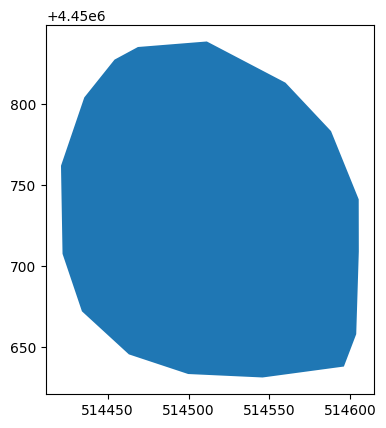

In [11]:
buowl[buowl['habitat_id']==378].plot()

Now lets calculate the length of some linear features

In [12]:
linears.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The linears GeoDataFrame is projected with geographic coordinates (latitude and longitude) which are not suitable for calculating measurements.  

We could of course reproject the entire GeoDataFrame like we did with burrowing owls but what if we want to leave the GeoDataFrame in geographic coordinates and still get a length in meters?

In [13]:
linears['length']=linears['geometry'].to_crs(epsg=26913).length
linears

,postgis_fi,type,row_width,Project,geometry,length
0,50,Flowline,20.0,50,"LINESTRING (-104.59795 40.19258, -104.59739 40...",61.493007
1,67,Pipeline,50.0,67,"LINESTRING (-105.05555 40.06609, -105.05941 40...",1598.899548
2,68,Pipeline,50.0,68,"LINESTRING (-105.04607 40.10830, -105.04566 40...",944.785359
3,69,Flowline,20.0,69,"LINESTRING (-104.83998 40.21731, -104.83930 40...",258.978327
4,70,Flowline,20.0,70,"LINESTRING (-104.77210 40.20982, -104.77193 40...",254.149412
...,...,...,...,...,...,...
1104,1105,Flowline,20.0,1105,"LINESTRING (-104.76461 40.08340, -104.76410 40...",110.625879
1105,1106,Pipeline,50.0,1106,"LINESTRING (-104.88730 40.13059, -104.89431 40...",5980.267782
1106,1107,Pipeline,50.0,1107,"LINESTRING (-104.81084 40.13516, -104.80847 40...",5652.843524
1107,1108,Pipeline,50.0,1108,"LINESTRING (-104.85211 40.11728, -104.85257 40...",39.213896


Just for fun lets calculate the area and length of a point GeoDataFrame

In [14]:
raptors['area']=raptors['geometry'].area
raptors['length']=raptors['geometry'].length
raptors

C:\Users\merve\AppData\Local\Temp\ipykernel_1556\2389550892.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  raptors['area']=raptors['geometry'].area
C:\Users\merve\AppData\Local\Temp\ipykernel_1556\2389550892.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  raptors['length']=raptors['geometry'].length


,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,area,length
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891),0.0,0.0
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089),0.0,0.0
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694),0.0,0.0
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215),0.0,0.0
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297),0.0,0.0
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975),0.0,0.0
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432),0.0,0.0
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443),0.0,0.0
